<!--COURSE_INFORMATION-->
*This notebook contains material from [ND Pyomo Cookbook](http://jckantor.github.io/ND-Pyomo-Cookbook/) by 
Jeffrey Kantor (jeff at nd.edu); the content is available [on GitHub](https://github.com/jckantor/ND-Pyomo-Cookbook).
*The text is released under the [CC-BY-NC-ND-4.0 license](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode),
and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


<!--NAVIGATION-->
< [Simulation](http://nbviewer.jupyter.org/github/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/05.00-Simulation.ipynb) | [Contents](index.ipynb) | [Exothermic CSTR](http://nbviewer.jupyter.org/github/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/05.02-Exothermic-CSTR.ipynb) >
<p><a href="https://colab.research.google.com/github/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/05.01-Response-of-a-First-Order-System-to-Step-and-Square-Wave-Inputs.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>


# Response of a First Order System to Step and Square Wave Inputs

This notebook demonstrates simulation of a linear first-order system in Pyomo using the `Simulator` class from Pyomo.  The notebook also demonstrates the construction and use of analytical approximations to step functions and square wave inputs.

In [0]:
!pip install -q pyomo

## First-Order Differential Equation with Constant Input

The following cell simulates the response of a first-order linear model in the form

\begin{align}
\tau\frac{dy}{dt} + y & = K u(t) \\
\end{align}

where $\tau$ and $K$ are model parameters, and $u(t)=1$ is an external process input.  

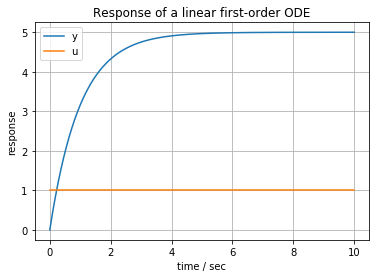

In [2]:
% matplotlib inline
from pyomo.environ import *
from pyomo.dae import *
import matplotlib.pyplot as plt

tfinal = 10
tau = 1
K = 5

# define u(t)
u = lambda t: 1

# create a model object
model = ConcreteModel()

# define the independent variable
model.t = ContinuousSet(bounds=(0, tfinal))

# define the dependent variables
model.y = Var(model.t)
model.dydt = DerivativeVar(model.y)

# fix the initial value of y
model.y[0].fix(0)

# define the differential equation as a constraint
model.ode = Constraint(model.t, rule=lambda model, t: tau*model.dydt[t] + model.y[t] == K*u(t))

# simulation using scipy integrators
tsim, profiles = Simulator(model, package='scipy').simulate(numpoints=1000)

fig, ax = plt.subplots(1, 1)
ax.plot(tsim, profiles, label='y')
ax.plot(tsim, [u(t) for t in tsim], label='u')
ax.set_xlabel('time / sec')
ax.set_ylabel('response')
ax.set_title('Response of a linear first-order ODE')
ax.legend()
ax.grid(True)

## Encapsulating into a Function

In following cells we would like to explore the response of a first order system to changes in parameters and input functions. To facilitate this study, the next cell encapsulates the simulation into a function that can be called with different parameter values and input functions.

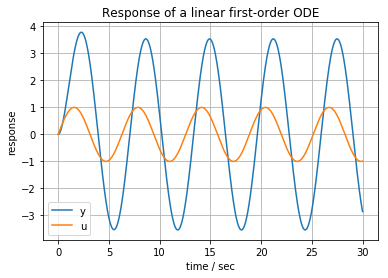

In [3]:
% matplotlib inline
from pyomo.environ import *
from pyomo.dae import *
import matplotlib.pyplot as plt

def first_order(K=1, tau=1, tfinal=1, u=lambda t: 1):
    model = ConcreteModel()
    model.t = ContinuousSet(bounds=(0, tfinal))
    model.y = Var(model.t)
    model.dydt = DerivativeVar(model.y)
    model.y[0].fix(0)
    model.ode = Constraint(model.t, rule=lambda model, t: 
                           tau*model.dydt[t] + model.y[t] == K*u(t))
    
    tsim, profiles = Simulator(model, package='scipy').simulate(numpoints=1000)

    fig, ax = plt.subplots(1, 1)
    ax.plot(tsim, profiles, label='y')
    ax.plot(tsim, [u(t) for t in tsim], label='u')
    ax.set_xlabel('time / sec')
    ax.set_ylabel('response')
    ax.set_title('Response of a linear first-order ODE')
    ax.legend()
    ax.grid(True)
    
first_order(5, 1, 30, sin)

## Analytical Approximation to a Step Input

The response to a step change is a common test giving insight into the dynamics of a given system. An infinitely differentiable approximation to a step change is given by the *Butterworth function* $b_n(t)$

$$ b_n(t) = \frac{1}{1 + (\frac{t}{c})^n} $$

where $n$ is the order of a approximation, and $c$ is value of $t$ where the step change occurs.

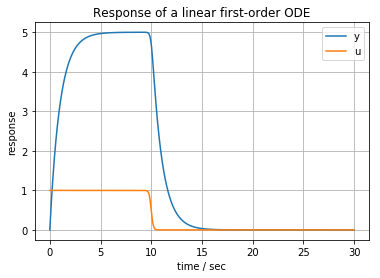

In [4]:
u = lambda t: 1/(1 + (t/10)**100)

first_order(5, 1, 30, u)

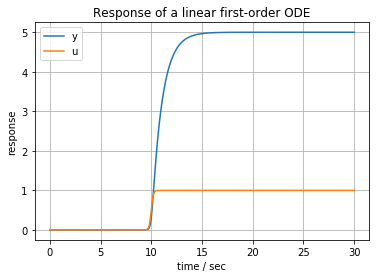

In [5]:
u = lambda t: 1 - 1/(1 + (t/10)**100)

first_order(5, 1, 30, u)

## Analytical Approximation to a Square Wave Input

An analytical approximation to a square wave with frequency $f$ is given by

$$\frac{4}{\pi} \sum_{k=1, 3, 5,\ldots}^N \frac{sin(k\pi/N)}{k\pi/N}\frac{sin(2\pi ft)}{k}$$

where the first term is the *Lanczos* sigma factor designed to suppress the Gibb's phenomenon associated with Fourier series approximations.

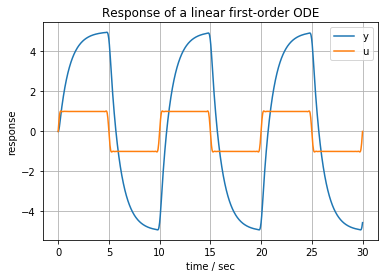

In [6]:
from math import pi
def square(t, f=1, N=31):
    return (4/pi)*sum((N*sin(k*pi/N)/k/pi)*sin(2*k*f*pi*t)/k for k in range(1, N+1,2))
  
u = lambda t: square(t, 0.1)

first_order(5, 1, 30, u)

<!--NAVIGATION-->
< [Simulation](05.00-Simulation.ipynb) | [Contents](index.ipynb) | [Exothermic CSTR](05.02-Exothermic-CSTR.ipynb) >

<a href="https://colab.research.google.com/github/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/05.01-Linear-First-Order-System.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


<!--NAVIGATION-->
< [Simulation](http://nbviewer.jupyter.org/github/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/05.00-Simulation.ipynb) | [Contents](index.ipynb) | [Exothermic CSTR](http://nbviewer.jupyter.org/github/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/05.02-Exothermic-CSTR.ipynb) >
<p><a href="https://colab.research.google.com/github/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/05.01-Response-of-a-First-Order-System-to-Step-and-Square-Wave-Inputs.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>
